<a href="https://colab.research.google.com/github/Braian8825/CRISP-DM/blob/main/Fase_2_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FASE DE ENTENDIMIENTO DE LOS DATOS**

En esta sección, se busca obtener un conocimiento profundo de los datos que se utilizarán en el análisis del problema del dinero gastado por las aseguradoras americanas a causa de fraudes en el sistema de salud.


1. **RECOPILACIÓN DE LOS DATOS**


De acuerdo al paso de comprensión del negocio, se tiene una base de datos que consiste en información de reclamos de aseguradoras americanas en el área de los seguros médicos por negligencia médica en el sistema de salud. Esta base de datos en un archivo .csv (cuyo nombre es medmal_pos.csv) y contiene las siguientes variables:

**GRCODE**: Código de la aseguradora (incluidos los grupos de aseguradoras y los aseguradores individuales).

**GRNAME**: Nombre de la aseguradora (incluidos los grupos de aseguradoras y los aseguradores individuales).

**AccidentYear** Año del accidente (desde 1988 hasta 1997).

**DevelopmentYear** Año de desarrollo del reclamo (desde 1988 hasta 1997).

**DevelopmentLag** Año de retrazo (calculado como: año del accidente-1987 + año de desarrollo del reclamo-1987 - 1).

**IncurLoss_F2** Pérdidas incurridas y gastos asignados reportados al final del año por negligencia médica.

**CumPaidLoss_F2** Pérdidas pagadas acumuladas y gastos asignados al final del año por negligencia médica.

**BulkLoss_F2** Seguro del portafolio (Bulk) y reserva de siniestros ocurridos y no reportados (IBNR reserves) sobre pérdidas netas y gastos de defensa y contención de costos reportados al final del año por negligencia médica.

**PostedReserve97_F2** Reservas contabilizadas en el año 1997 tomadas del Anexo de Suscripción e Inversiones, incluidas las pérdidas netas no pagadas y los gastos de ajuste de pérdidas no pagados por negligencia médica.

**EarnedPremDIR_F2** Primas devengadas en el año incurrido: directas y asumidas por negligencia médica.

**EarnedPremCeded_F2** Primas devengadas en el año incurrido: cedidas por negligencia médica.

**EarnedPremNet_** Primas netas devengadas en el año en que se incurrió por negligencia médica: 1 indica una sola entidad, 0 indica una aseguradora grupal.

**F2**: Reclamos hechos por negligencia médica.

Esta base de datos fue tomada de Casualty Actuarial Society (CAS) cuyo website es: https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p. Estos archivos son públicos y no tienen ninguna restricción sobre su uso. Este formato se encuentra completo y no tiene problemas con el tratamiento de los datos.


2. **Recopilación de los datos**


Se inicia con la exploración inicial de los datos descritos en 1. y se calculan algunas medidas de tendencia central para corroborar si los datos son acordes o contienen outliers o valores que puedan causar problemas:

In [3]:
!pip install triangle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00


In [4]:
# Este es el análisis inicial de los datos.

from google.colab import drive

drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install chainladder
import chainladder as cl
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.1 MB/s eta 0:00:00


In [5]:
file_path = '/content/drive/MyDrive/medmal_pos.csv' ##Importación de los datos desde drive##

df = pd.read_csv(file_path)


df

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
1,669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558
2,669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558
3,669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558
4,669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,44504,California Healthcare Ins Co Inc,1997,2002,6,3970,3971,-1,9711,5704,4007,1,15719
3396,44504,California Healthcare Ins Co Inc,1997,2003,7,3965,3965,0,9711,5704,4007,1,15719
3397,44504,California Healthcare Ins Co Inc,1997,2004,8,3965,3965,0,9711,5704,4007,1,15719
3398,44504,California Healthcare Ins Co Inc,1997,2005,9,3965,3965,0,9711,5704,4007,1,15719


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GRCODE              3400 non-null   int64 
 1   GRNAME              3400 non-null   object
 2   AccidentYear        3400 non-null   int64 
 3   DevelopmentYear     3400 non-null   int64 
 4   DevelopmentLag      3400 non-null   int64 
 5   IncurLoss_F2        3400 non-null   int64 
 6   CumPaidLoss_F2      3400 non-null   int64 
 7   BulkLoss_F2         3400 non-null   int64 
 8   EarnedPremDIR_F2    3400 non-null   int64 
 9   EarnedPremCeded_F2  3400 non-null   int64 
 10  EarnedPremNet_F2    3400 non-null   int64 
 11  Single              3400 non-null   int64 
 12  PostedReserve97_F2  3400 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 345.4+ KB


Se observa que hay un total de 13 variables, de donde solo la variable **GRNAME** tiene datos cualitativos. Las demás variables manejan datos cuantitativos. Esto sucede, pues **GRNAME** tiene el nombre de las aseguradoras o grupo de aseguradoras que le hicieron el reclamo por negligencia médica. Los datos se describen a continuación:

In [7]:
df.describe()

,GRCODE,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,22809.764706,1992.500000,1997.000000,5.500000,11609.344412,6706.067059,1095.803235,14111.605882,1803.497059,12308.108824,0.852941,57065.529412
std,14708.377001,2.872704,4.062617,2.872704,26802.819463,17121.815066,7612.672277,26399.284476,3893.424584,24824.225795,0.354217,134355.533990
min,669.000000,1988.000000,1988.000000,1.000000,-17.000000,-1190.000000,-32101.000000,-781.000000,-6214.000000,-728.000000,0.000000,0.000000
25%,10341.000000,1990.000000,1994.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,629.000000
50%,19764.000000,1992.500000,1997.000000,5.500000,645.000000,187.000000,0.000000,1500.000000,106.500000,1302.000000,1.000000,5875.000000
75%,36234.000000,1995.000000,2000.000000,8.000000,9050.500000,4385.500000,107.250000,18094.500000,1473.500000,13490.000000,1.000000,46762.000000
max,44504.000000,1997.000000,2006.000000,10.000000,179425.000000,113189.000000,104402.000000,131948.000000,25553.000000,135318.000000,1.000000,702246.000000


Por otro lado, se quiere saber si la base de datos con la que contamos cuenta con datos atípicos. Esto es de suma importancia para así saber si los datos están distribuidos de manera normal.

Axes(0.125,0.11;0.775x0.77)


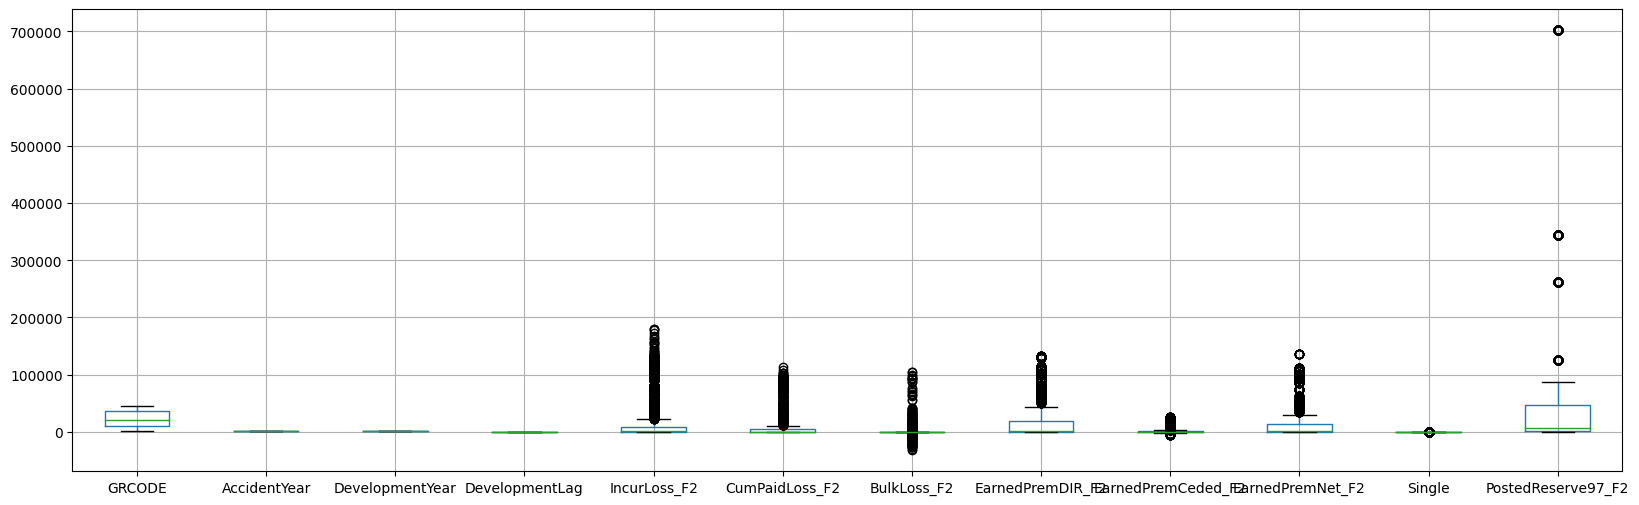

In [8]:
plt.figure(figsize=(20, 6))
print(df.boxplot())

Se puede observar que del número total de las aseguradoras, solo 4 aseguradoras no poseen datos atípicos. Esto quiere decir que para estas 4 aseguradoras no poseen datos extremos que distorsionen la percepción de la mayoría de los datos. Esto puede ser útil para identificar tendencias generales y comparar distribuciones entre diferentes grupos o categorías sin la influencia de valores atípicos.

Se toma ahora una sola aseguradora para apreciar los datos atípicos de forma detenida:

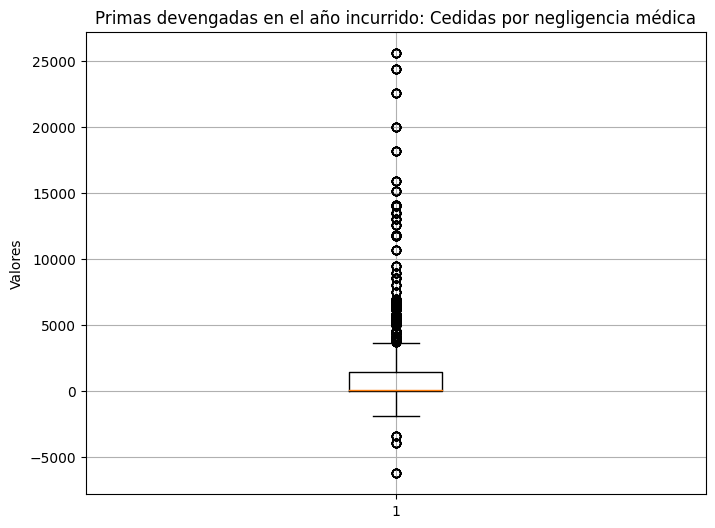

In [9]:
# Grafica de un diagrama de cajas y bigote de la columna EarnedPremCeded_F2
#(Primas devengadas en el año incurrido: cedidas por negligencia médica).
import matplotlib.pyplot as plt

Caja = df['EarnedPremCeded_F2']

plt.figure(figsize=(8, 6))  # Opcional: ajusta el tamaño del gráfico
plt.boxplot(Caja)

plt.title('Primas devengadas en el año incurrido: Cedidas por negligencia médica')
plt.ylabel('Valores')
plt.grid(True)

plt.show()

Se observa que en esta aseguradora existen muchos datos atípicos. En este sentido, parece una excelente opción disgregar la información con respecto a cada compañía. Este proceso se puede hacer para todas las aseguradoras. En nuestro caso, se continuará con el global de los datos y no solo con una sola aseguradora.

La multicolinealidad de los datos de todas las aseguradoras se muestran a continuación:

In [10]:
print(df.corr())

                          GRCODE  AccidentYear  DevelopmentYear  \
GRCODE              1.000000e+00  7.665625e-14    -1.304826e-13   
AccidentYear        7.665625e-14  1.000000e+00     7.071068e-01   
DevelopmentYear    -1.304826e-13  7.071068e-01     1.000000e+00   
DevelopmentLag     -2.127303e-15  1.775597e-15     7.071068e-01   
IncurLoss_F2        3.709522e-02  7.041574e-02     1.123293e-02   
CumPaidLoss_F2     -3.274058e-02  9.463845e-02     1.828621e-01   
BulkLoss_F2        -1.018426e-01 -4.494997e-02    -1.836975e-01   
EarnedPremDIR_F2    4.661804e-02  4.216493e-02     2.981511e-02   
EarnedPremCeded_F2  1.485769e-01  7.364024e-02     5.207152e-02   
EarnedPremNet_F2    2.627312e-02  3.329052e-02     2.353995e-02   
Single              5.793551e-01  2.353336e-13    -2.890495e-14   
PostedReserve97_F2  1.473483e-01 -7.882656e-14    -6.406502e-14   

                    DevelopmentLag  IncurLoss_F2  CumPaidLoss_F2  BulkLoss_F2  \
GRCODE               -2.127303e-15      0.03709

Ahora, se quiere encontrar los datos de solo una aseguradora. Primero se saca los nombres de las aseguradoras:

In [11]:
NOMBRE_ASEGURADORA = df['GRNAME']
NOMBRE_ASEGURADORA

0                     Scpie Indemnity Co
1                     Scpie Indemnity Co
2                     Scpie Indemnity Co
3                     Scpie Indemnity Co
4                     Scpie Indemnity Co
                      ...               
3395    California Healthcare Ins Co Inc
3396    California Healthcare Ins Co Inc
3397    California Healthcare Ins Co Inc
3398    California Healthcare Ins Co Inc
3399    California Healthcare Ins Co Inc
Name: GRNAME, Length: 3400, dtype: object

In [ ]:
df['GRNAME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3400 entries, 0 to 3399
Series name: GRNAME
Non-Null Count  Dtype 
--------------  ----- 
3400 non-null   object
dtypes: object(1)
memory usage: 26.7+ KB


In [12]:
print(NOMBRE_ASEGURADORA.describe())


count                   3400
unique                    34
top       Scpie Indemnity Co
freq                     100
Name: GRNAME, dtype: object


Acá se observa que hay un total de 34 aseguradoras, cada una de ellas aporta un total de 100 datos, lo que conforma las 3400 entradas de la base principal.

Los nombre de las aseguradoras son:

In [13]:
#Nombres de las aseguradoras que recibieron reclamos por negligencia médica:
nombres = df['GRNAME'].unique()

# Convierte la salida en una lista si es necesario
nombres_lista = nombres.tolist()

# Imprime los nombres únicos
print(nombres_lista)


['Scpie Indemnity Co', 'Promutual Grp', 'Great Amer Grp', 'Nationwide Grp', 'Markel Corp Grp', 'Overseas Partners Us Reins Co', 'Eastern Dentists Ins Co RRG', 'American Assoc Of Othodontists RRG', 'Controlled Risk Ins Co Of VT Inc', 'Texas Medical Ins Co', 'MCIC VT Inc RRG', 'Franklin Cas Ins Co RRG', 'Homestead Ins Co', 'Campmed Cas & Ind Co Inc MD', 'Community Blood Cntr Exch RRG', 'Underwriters At Lloyds London', 'NCMIC Ins Co', 'National American Ins Co', 'Michigan Professional Ins Exch', 'Nichido Fire & Marine Ins Co Ltd', 'Texas Hospital Ins Exch', 'State Volunteer Mut Ins Co', 'MHA Ins Co', 'Health Care Ind Inc', 'National Guardian RRG Inc', 'Preferred Professional Ins Co', 'Medical Mut Ins Co Of ME', 'Utah Medical Ins Assoc', 'Seguros Triples Inc', 'Dentists Ins Co', 'Physicians Recip Insurers', 'Louisiana Med Mut Ins Co', 'Clinic Mut Ins Co RRG', 'California Healthcare Ins Co Inc']


In [14]:
conteo = df['GRNAME'].value_counts() ##Genera los nombres de las aseguradoras.##
conteo

Scpie Indemnity Co                    100
Preferred Professional Ins Co         100
Nichido Fire & Marine Ins Co Ltd      100
Texas Hospital Ins Exch               100
State Volunteer Mut Ins Co            100
MHA Ins Co                            100
Health Care Ind Inc                   100
National Guardian RRG Inc             100
Medical Mut Ins Co Of ME              100
Promutual Grp                         100
Utah Medical Ins Assoc                100
Seguros Triples Inc                   100
Dentists Ins Co                       100
Physicians Recip Insurers             100
Louisiana Med Mut Ins Co              100
Clinic Mut Ins Co RRG                 100
Michigan Professional Ins Exch        100
National American Ins Co              100
NCMIC Ins Co                          100
Underwriters At Lloyds London         100
Community Blood Cntr Exch RRG         100
Campmed Cas & Ind Co Inc MD           100
Homestead Ins Co                      100
Franklin Cas Ins Co RRG           

A continuación se ordena un DataFrame (df) por una columna específica llamada 'GRNAME' en orden descendente (ascending=False). El resultado de esta operación es un nuevo DataFrame llamado df_ordenado que contiene las filas del DataFrame original, pero reorganizadas según los valores en la columna 'GRNAME' de mayor a menor. Esto se utiliza para ordenar los datos en función de una variable particular.

In [15]:
df_ordenado = df.sort_values(by='GRNAME', ascending=False)
df_ordenado
np.histogram

<function numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)>

Como ya se tiene un análisis preliminar de los datos y nuestro objetivo es hacer una predicción de datos para determinar el valor óptimo que la aseguradora debe guardar para obtener las mínimas pérdidas posibles, las variables que se eligirán serán:

1. AccidentYear
2. DevelopmentYear
3. IncurLoss_F2
4. CumPaidLoss_F2

Se eligen estas 4 variables porse se considera que ellas me pueden determinar una predicción de lo que estamos buscando.

Ahora se realiza la visualización de estos datos:

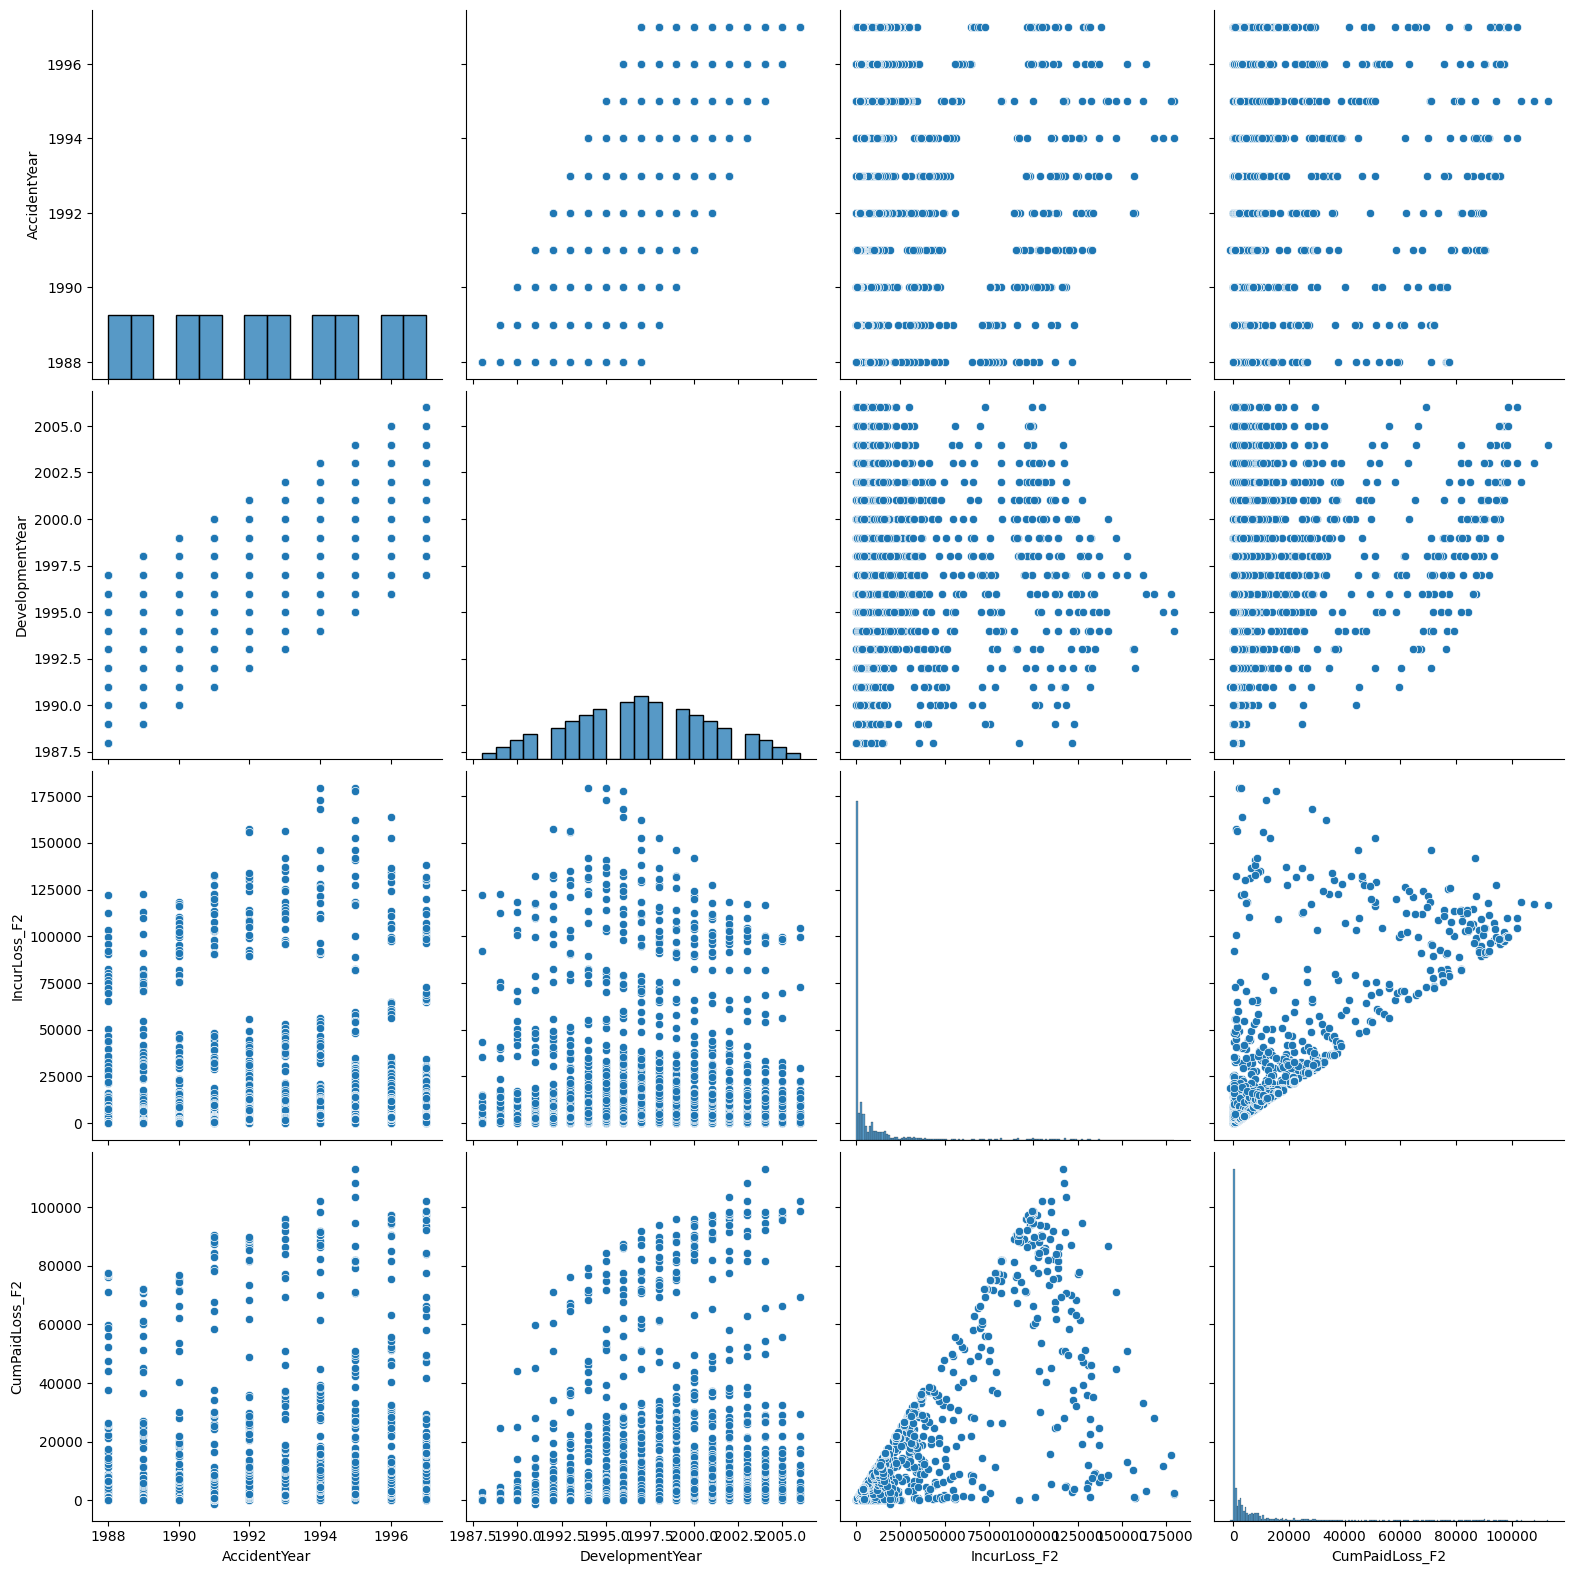

In [16]:
# Data visualization
sns.pairplot(df[['AccidentYear', 'DevelopmentYear', 'IncurLoss_F2', 'CumPaidLoss_F2']],height=4)



plt.show()

Las correlaciones de los datos se muestran a continuación:

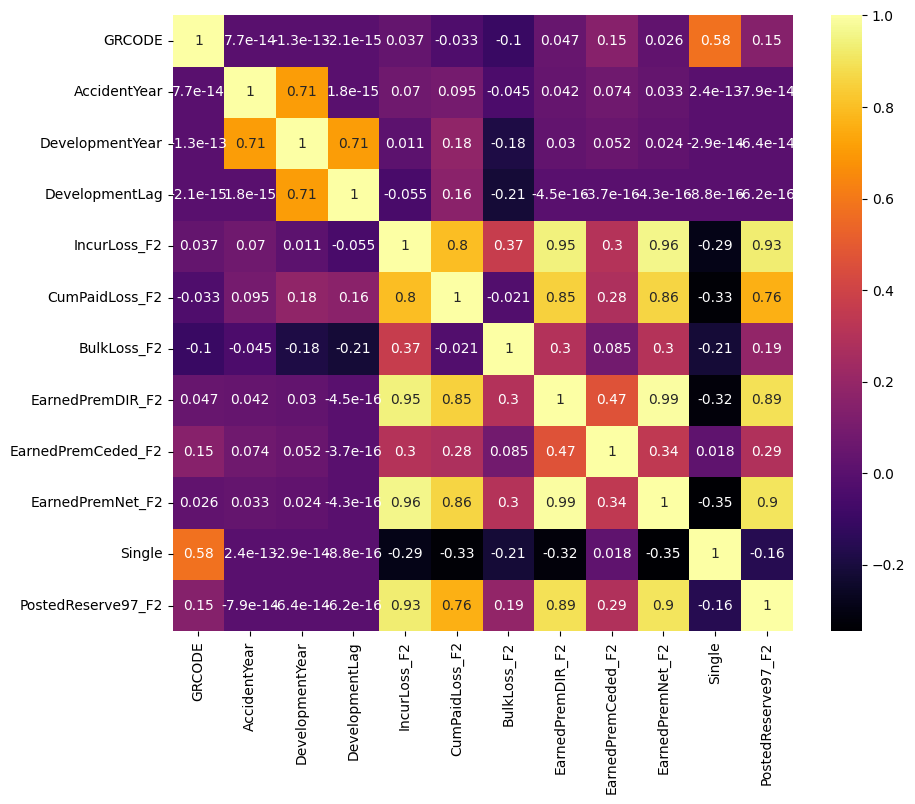

In [17]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='inferno')
plt.show()

Vemos que se forma una matriz que muestra las correlaciones correspodientes entre todas las variables. Es claro que es 1 si una variable está correlacionada con ella misma: Por ejemplo, AccidentYear tiene una correlación de 1 con ella misma, pero tiene una correlación de 0,18 con CumPaidLoss_F2.

Ahora, para nuestras variables de interés (que son 4), no se considera la variable 'AccidentYear' por el tipo de variable (categórica) que es diferente a las otras variables (numéricas). En este caso, las gráficas de distribución son, respectivamente:

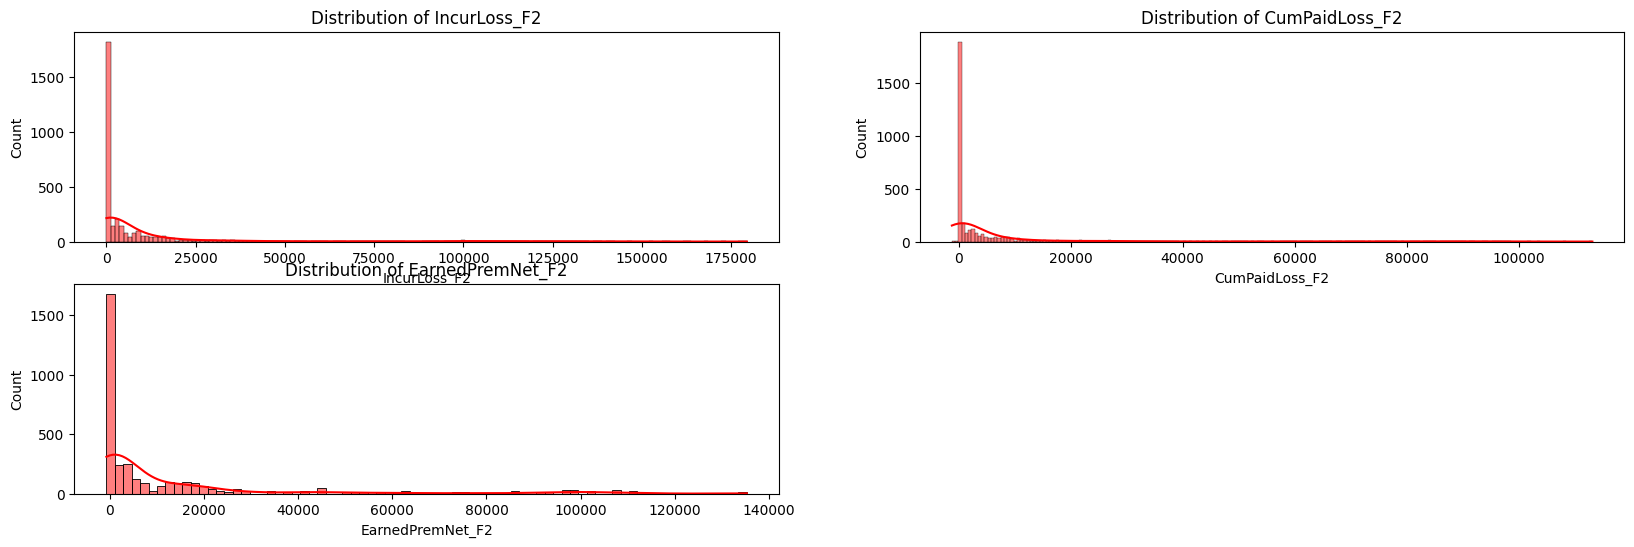

In [18]:
our_interest_plot = ['IncurLoss_F2', 'CumPaidLoss_F2', 'EarnedPremNet_F2']
plt.figure(figsize=(20, 6))
for i, column in enumerate(our_interest_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, color='red')
    plt.title(f'Distribution of {column}')

In [19]:


# Proceso para obtener los datos de una sola aseguradora. En este caso será la aseguradora promutual Grp

Promutual = "Promutual Grp"
Aseguradora_1 = df[df['GRNAME'] == Promutual]

# Imprime los resultados
print(Aseguradora_1)

     GRCODE         GRNAME  AccidentYear  DevelopmentYear  DevelopmentLag  \
100     683  Promutual Grp          1988             1988               1   
101     683  Promutual Grp          1988             1989               2   
102     683  Promutual Grp          1988             1990               3   
103     683  Promutual Grp          1988             1991               4   
104     683  Promutual Grp          1988             1992               5   
..      ...            ...           ...              ...             ...   
195     683  Promutual Grp          1997             2002               6   
196     683  Promutual Grp          1997             2003               7   
197     683  Promutual Grp          1997             2004               8   
198     683  Promutual Grp          1997             2005               9   
199     683  Promutual Grp          1997             2006              10   

     IncurLoss_F2  CumPaidLoss_F2  BulkLoss_F2  EarnedPremDIR_F2  \
100    

In [20]:
Aseguradora_1.info()
#from triangle import Triangle

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 100 to 199
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GRCODE              100 non-null    int64 
 1   GRNAME              100 non-null    object
 2   AccidentYear        100 non-null    int64 
 3   DevelopmentYear     100 non-null    int64 
 4   DevelopmentLag      100 non-null    int64 
 5   IncurLoss_F2        100 non-null    int64 
 6   CumPaidLoss_F2      100 non-null    int64 
 7   BulkLoss_F2         100 non-null    int64 
 8   EarnedPremDIR_F2    100 non-null    int64 
 9   EarnedPremCeded_F2  100 non-null    int64 
 10  EarnedPremNet_F2    100 non-null    int64 
 11  Single              100 non-null    int64 
 12  PostedReserve97_F2  100 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 10.9+ KB


## **Triángulo de siniestros usando Chain-Ladder**

Este triángulo es una herramienta gráfica y analítica que se utiliza para realizar un seguimiento y analizar la evolución de las pérdidas o siniestros a lo largo del tiempo. Cada vértice del triángulo representa un año o período, y los datos en el triángulo muestran cómo las pérdidas se desarrollan y cambian a medida que pasa el tiempo. Este se utiliza en la actuaria para estimar la cantidad de siniestros pendientes (siniestros que aún no se han liquidado por completo) y para proyectar futuros siniestros y costos relacionados con seguros. Los actuarios analizan estos triángulos para evaluar la siniestralidad, establecer reservas y tomar decisiones sobre la fijación de primas de seguros, entre otras aplicaciones. A continuación se revisará la construcción

En primer lugar, definimos los valores de entrenamiento y de prueba:

In [21]:
df_train = df.head(3300).copy()
df_train['GRNAME'].value_counts()

Scpie Indemnity Co                    100
National American Ins Co              100
Louisiana Med Mut Ins Co              100
Physicians Recip Insurers             100
Dentists Ins Co                       100
Seguros Triples Inc                   100
Utah Medical Ins Assoc                100
Medical Mut Ins Co Of ME              100
Preferred Professional Ins Co         100
National Guardian RRG Inc             100
Health Care Ind Inc                   100
MHA Ins Co                            100
State Volunteer Mut Ins Co            100
Texas Hospital Ins Exch               100
Nichido Fire & Marine Ins Co Ltd      100
Michigan Professional Ins Exch        100
NCMIC Ins Co                          100
Promutual Grp                         100
Underwriters At Lloyds London         100
Community Blood Cntr Exch RRG         100
Campmed Cas & Ind Co Inc MD           100
Homestead Ins Co                      100
Franklin Cas Ins Co RRG               100
MCIC VT Inc RRG                   

In [22]:
df.columns ## LLamo las variables de interés

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2',
       'EarnedPremCeded_F2', 'EarnedPremNet_F2', 'Single',
       'PostedReserve97_F2'],
      dtype='object')

In [23]:
df_col_seleccionado = df[df.columns[0:6]]

In [24]:
Lista_entidades_ceros = df_col_seleccionado[df_col_seleccionado[df.columns[5]] <= 0]["GRCODE"].unique() ## omitir los ceros de la columna
df_filtrado = df_col_seleccionado[~df_col_seleccionado["GRCODE"].isin(Lista_entidades_ceros)]
df_filtrado[df_filtrado[df.columns[5]] <= 0]["GRCODE"].unique() #Vector vacío

array([], dtype=int64)

##**Construcción Chain-Ladder**

In [25]:
class ChainLadder:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = ""):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK

    def Triangulos(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_F2",
                                          self.index: "GRCODE"})

        diccionario_todos_triangulos = {}

        for k in datos["GRCODE"].unique():

            Filtro_datos = datos[datos["GRCODE"] == k]

            Triangulo_full = Filtro_datos.pivot_table(values = "IncurLoss_F2", index = "AccidentYear", columns='DevelopmentLag', aggfunc="sum", margins=False)

            Triangulo_full_acumulado = Triangulo_full.copy()

            num_filas = Triangulo_full_acumulado.shape[0]
            num_columnas = Triangulo_full_acumulado.shape[1]

            Triangulo_full_mitad = Triangulo_full.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_full_mitad.iloc[i, -j] = None  # Se puede usar otro valor si lo prefiere

            for indice, i in enumerate(range(1,num_columnas+1)):
                Triangulo_full_acumulado[Triangulo_full.columns[indice]] = Triangulo_full[Triangulo_full.columns[0:i]].sum(axis = 1)

            Triangulo_acumulado_mitad = Triangulo_full_acumulado.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_acumulado_mitad.iloc[i, -j] = None  # Se puede usar otro valor si lo prefiere

            factores0 = Triangulo_acumulado_mitad.sum(axis = 0) # Rojo
            factores1 = Triangulo_acumulado_mitad.sum(axis = 0)-np.flip(np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)) # Azul
            factores0 = factores0[1:10]
            factores1 = factores1[0:-1]
            factores = factores0.reset_index(drop = True) / factores1.reset_index(drop = True)

            Triangulo_estimado = Triangulo_acumulado_mitad.copy()
            for i in list(reversed(range(num_filas))):
                comodin = np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)[i]
                for j in range(1,i+1):
                    Triangulo_estimado.iloc[i, -j] = comodin*factores.iloc[-i+9:-j+10].prod()   # Se puede usar otro valor si lo prefiere



            reserva_total = sum(np.array(list(reversed(np.array(Triangulo_estimado[10]))))-np.flip(np.diag(np.fliplr(Triangulo_estimado), 0)))

            diciconario_triangulo = {'Triangulo_full':Triangulo_full, "Triangulo_full_mitad":Triangulo_full_mitad, "Triangulo_full_acumulado":Triangulo_full_acumulado,
                                     "Triangulo_acumulado_mitad":Triangulo_acumulado_mitad, "factores":factores, "Triangulo_estimado":Triangulo_estimado,
                                     "reserva_total":reserva_total}

            nombre = k
            diccionario_todos_triangulos[nombre] = diciconario_triangulo

        return diccionario_todos_triangulos


In [26]:
df_filtrado["GRCODE"].unique() #se evidencia los codigos de las compañias que aun tengo en mi DF

array([  669,   683,  7854, 32514, 33049, 33111, 36234, 36277, 36676,
       40568, 40975, 41467, 43656, 43770])

In [27]:
resultados = ChainLadder(tabla = df_filtrado, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_F2", index = "GRCODE")
triangulos_resultados = resultados.Triangulos()
triangulos_resultados

{669: {'Triangulo_full': DevelopmentLag      1       2       3       4       5      6      7      8   \
  AccidentYear                                                                  
  1988            121905  112211  103226   99599   96006  90487  82640  80406   
  1989            122679  113165  110037  101142   90817  81919  77491  73577   
  1990            118157  117497  116377   99895   89252  81916  79134  76333   
  1991            117981  122443  121056  113795  102830  98071  94870  91062   
  1992            131059  130155  124195  113974  106817  99182  92588  91000   
  1993            134700  130757  125253  114717  111294  98014  96872  95714   
  1994            136749  128192  121355  111877   96152  91502  90498  91870   
  1995            140962  132405  118332  100050   88809  82360  81986  81887   
  1996            134473  128980  113645  104273   99276  97782  97282  97738   
  1997            137944  127727  114057  107001  102143  99665  99942  99968   
  
  

In [28]:
prueba = triangulos_resultados[43656]["Triangulo_full_mitad"]
prueba

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,14401,14191.0,12843.0,9472.0,9965.0,8242.0,8089.0,7488.0,8116.0,7729.0
1989,13744,12906.0,10525.0,9371.0,7871.0,7566.0,7110.0,7148.0,6561.0,NaN
1990,15949,16354.0,15852.0,13053.0,11737.0,11019.0,11176.0,9656.0,NaN,NaN
1991,18942,16006.0,13405.0,11538.0,12349.0,12271.0,10885.0,NaN,NaN,NaN
1992,20949,20157.0,17870.0,16704.0,16469.0,14768.0,NaN,NaN,NaN,NaN
1993,21684,20708.0,17483.0,16437.0,14440.0,NaN,NaN,NaN,NaN,NaN
1994,19198,18597.0,17124.0,14480.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,21489,21409.0,20066.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,20427,18211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Regresión Lineal**

Se crean unas clases para poder realizar la regresión:



In [29]:
class LassoRegression:
    def __init__(self, alpha=1.0, max_iters=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X, y):
        n, p = X.shape[0], X.shape[1]
        self.beta = np.zeros(p)

        i = 0
        for _ in range(self.max_iters):
            beta_prev = np.copy(self.beta)
            i = i + 1
            for j in range(p):
                residuals = y - X.dot(self.beta)
                xj = X[:, j]
                rho = xj.dot(residuals)

                soft_threshold = np.sign(rho) * max(0, abs(rho) - self.alpha)
                self.beta[j] = soft_threshold / (xj.dot(xj))

            if np.linalg.norm(self.beta - beta_prev, ord=1) < self.tol:
                break
        return(i)

    def predict(self, X):
        return X.dot(self.beta)

In [30]:
class Reserva_Regresion_lineal:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = "", alpha = 1):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK
        self.alpha = alpha #OK

    def Regresion_lineal(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        resultados = ChainLadder(tabla = datos, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE")
        triangulos_resultados = resultados.Triangulos()

        #triangulos_resultados
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import Ridge

        size = triangulos_resultados[datos["GRCODE"].unique()[0]]["Triangulo_acumulado_mitad"].shape[0]#10
        size1 =  size**2 #100
        size2 = (size1-size)/2 + size #55
        cant_parametros = size*2-1 #19
        matriz_de_ceros = np.zeros((size1, cant_parametros)) #matriz de ceros
        matriz_de_ceros[:,0] = 1 #columna 0 se llene de unos
        for i in range(size): #recorre las columnas
            for j in range(size): #recorre las filas
                k = i*10+j
                if i != 0:
                    matriz_de_ceros[k,i] = 1
                if j != 0:
                    matriz_de_ceros[k,j+9] = 1

        self.matriz_de_ceros = pd.DataFrame(matriz_de_ceros)

        Y = pd.DataFrame()
        Y_completo = pd.DataFrame()
        matriz_X = pd.DataFrame()
        for i in datos["GRCODE"].unique():#[3492]:#
            triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
            triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
            triangulo_log =  np.log(triangulo)
            triangulo_completo_log = np.log(triangulo_completo)
            vector_Y = pd.melt(triangulo_log)
            vector_Y_completo = pd.melt(triangulo_completo_log)
            vector_Y["GRCODE"] = i
            Y = pd.concat([Y,vector_Y], axis = 0)
            Y_completo = pd.concat([Y_completo,vector_Y_completo], axis = 0)
            matriz_X = pd.concat([matriz_X, self.matriz_de_ceros], axis = 0)

        matriz_X = matriz_X.reset_index(drop=True)
        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        matriz_regresion = pd.concat([Y[["value", "GRCODE"]], Y_completo, matriz_X], axis = 1)
        matriz_regresion = matriz_regresion.reset_index(drop=True)
        matriz_regresion1 = matriz_regresion[~matriz_regresion["value"].isnull()]
        matriz_regresion1.columns = ['Z', "GRCODE", "Z_completo", "u", "alpha1", "alpha2", "alpha3", "alpha4", "alpha5",
                                    "alpha6", "alpha7", "alpha8", "alpha9", "beta1", "beta2", "beta3",
                                    "beta4", "beta5", "beta6", "beta7", "beta8", "beta9"]
        matriz_regresion1 = matriz_regresion1.reset_index(drop=True)
        X = matriz_regresion1.iloc[:,3:]
        Y = matriz_regresion1.iloc[:,0]
        XX = np.dot(X.T,X)
        ##########
        #lambda_ridge = 0
        XX_ridge = np.dot(X.T,X)+X.shape[0]*self.alpha*np.identity(XX.shape[0])
        inversa_XX = np.linalg.inv(XX)
        inversa_XX_ridge = np.linalg.inv(XX_ridge)
        self.B = np.dot(np.dot(inversa_XX,X.T),Y)
        self.B_ridge = np.dot(np.dot(inversa_XX_ridge,X.T),Y)
        #ridge sklearn
        self.ridge_model = Ridge(alpha = self.alpha)
        self.ridge_model.fit(np.array(X), np.array(Y))
        self.B_ridge_1 = self.ridge_model.coef_
        #####################
        alpha_lasso = 0
        self.lasso_model = Lasso(alpha = self.alpha)
        self.lasso_model.fit(np.array(X), np.array(Y))
        self.B_lasso = self.lasso_model.coef_
        #lasso.fit(np.array(X), np.array(Y))
        X_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,3:]
        Y_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,2]
        Y_codigo_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,1]
        Y_codigo_test.reset_index(drop=True)
        Y_Ajustado = np.dot(X_test,self.B)
        Y_Ajustado_ridge = np.dot(X_test,self.B_ridge)
        Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        Y_Ajustado_lasso = self.lasso_model.predict(X_test)
        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        #metrica
        comparacion["GRCODE"] = np.array(Y_codigo_test)

        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}

        return diccionario_resultados

    def predict(self, datos_new):
        datos = datos_new.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        resultados = ChainLadder(tabla = datos, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE")
        triangulos_resultados = resultados.Triangulos()

        i = datos["GRCODE"].unique()[0]#[3492]:#
        triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
        triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
        triangulo_log =  np.log(triangulo)
        triangulo_completo_log = np.log(triangulo_completo)
        vector_Y = pd.melt(triangulo_log)
        vector_Y_completo = pd.melt(triangulo_completo_log)
        vector_Y["GRCODE"] = i
        Y = vector_Y
        Y_completo = vector_Y_completo

        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        X = self.matriz_de_ceros

        matriz_new = pd.concat([Y[["value", "GRCODE"]], Y_completo, X], axis = 1)
        matriz_new = matriz_new.reset_index(drop=True)

        Y_test = matriz_new[matriz_new["value"].isnull()].iloc[:,2]
        X_test = matriz_new[matriz_new["value"].isnull()].iloc[:,3:]

        Y_Ajustado = np.dot(X_test,self.B)
        Y_Ajustado_ridge = np.dot(X_test,self.B_ridge)
        Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        Y_Ajustado_lasso = self.lasso_model.predict(X_test)

        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        #metrica
        comparacion["GRCODE"] = np.array(i)

        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados_test = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}

        return diccionario_resultados_test

In [31]:
#7854, 32514,
df_filtrado_unico = df_filtrado[df_filtrado["GRCODE"] == 7854] # para el codigo 7859 con este entreno
df_filtrado_unico1 = df_filtrado[df_filtrado["GRCODE"] == 32514] # para el codigo 32414 con testeo
df_filtrado #Dataframe completo con todas las aseguradoras

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905
1,669,Scpie Indemnity Co,1988,1989,2,112211
2,669,Scpie Indemnity Co,1988,1990,3,103226
3,669,Scpie Indemnity Co,1988,1991,4,99599
4,669,Scpie Indemnity Co,1988,1992,5,96006
...,...,...,...,...,...,...
3295,43770,Clinic Mut Ins Co RRG,1997,2002,6,886
3296,43770,Clinic Mut Ins Co RRG,1997,2003,7,732
3297,43770,Clinic Mut Ins Co RRG,1997,2004,8,732
3298,43770,Clinic Mut Ins Co RRG,1997,2005,9,709


**Se procede a entrenar el modelo**:

In [32]:
resultados_1 = Reserva_Regresion_lineal(tabla = df_filtrado_unico, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_F2", index = "GRCODE", alpha = 0.01)
resultados_regresion = resultados_1.Regresion_lineal()

In [33]:
resultados_regresion["Metricas MSE"]

{'MSE': 0.07810109833332896,
 'MSE_ridge_1': 0.07999427584961873,
 'MSE_lasso': 0.1173975084763827}

In [34]:
resultados_regresion["Metricas MAPE"]

{'MAPE': 2.459870177672769,
 'MAPE_ridge_1': 2.4933601092746724,
 'MAPE_lasso': 3.0120383377168367}

In [35]:
resultados_regresion["coeficientes"]

{'Coef_normal': array([ 9.06758776,  0.05927999,  0.10739344, -0.03211291, -0.13593951,
        -0.22821312, -0.31255216, -0.3561931 , -0.43628758, -0.43867432,
        -0.31299535,  0.0369955 , -0.07078009,  0.27476939,  0.64625187,
         0.73758638,  1.10830463,  1.35699062,  0.96955618]),
 'Coef_ridge1': array([ 0.        ,  0.06012676,  0.10739355, -0.03247676, -0.13651514,
        -0.22897123, -0.31336561, -0.357017  , -0.43698819, -0.43934507,
        -0.31735265,  0.03220204, -0.07549871,  0.26939797,  0.63992632,
         0.73057498,  1.09929382,  1.34477913,  0.95494255]),
 'Coef_lasso': array([ 0.        ,  0.11832903,  0.13575745,  0.        , -0.        ,
        -0.07102657, -0.1561858 , -0.1486222 , -0.1391175 , -0.        ,
        -0.38509916, -0.00522541, -0.08738498,  0.100447  ,  0.47128446,
         0.55633527,  0.88196744,  1.03860216,  0.40569333])}

In [36]:
resultados_regresion["X"]

,u,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,beta1,beta2,beta3,beta4,beta5,beta6,beta7,beta8,beta9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
resultados_regresion["Comparacion"]

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_ridge_1,Y_ajustado_lasso,GRCODE
0,10.078617,10.096424,9.933355,10.087721,9.605473,7854
1,10.474778,10.531972,10.324825,10.524825,10.255810,7854
2,10.053587,10.144537,9.957006,10.134988,9.622901,7854
3,10.296239,10.143779,10.029071,10.139469,9.963418,7854
4,10.362557,10.392465,10.180877,10.384954,10.120053,7854
5,10.055651,10.005031,9.813058,9.995118,9.487144,7854
6,9.732106,9.669235,9.626445,9.666712,9.637786,7854
7,10.286093,10.039953,9.927140,10.035431,9.963418,7854
8,10.296003,10.288639,10.078946,10.280916,10.120053,7854
9,10.017263,9.901204,9.711127,9.891079,9.487144,7854


In [38]:
df_filtrado_unico1

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
2000,32514,Texas Hospital Ins Exch,1988,1988,1,5251
2001,32514,Texas Hospital Ins Exch,1988,1989,2,4601
2002,32514,Texas Hospital Ins Exch,1988,1990,3,3042
2003,32514,Texas Hospital Ins Exch,1988,1991,4,3247
2004,32514,Texas Hospital Ins Exch,1988,1992,5,3552
...,...,...,...,...,...,...
2095,32514,Texas Hospital Ins Exch,1997,2002,6,4670
2096,32514,Texas Hospital Ins Exch,1997,2003,7,4631
2097,32514,Texas Hospital Ins Exch,1997,2004,8,4608
2098,32514,Texas Hospital Ins Exch,1997,2005,9,4645


**Test**

In [39]:
resultados_nuevos  = resultados_1.predict(df_filtrado_unico1)

In [40]:
resultados_nuevos["Comparacion"]

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_ridge_1,Y_ajustado_lasso,GRCODE
0,8.684570,10.096424,9.933355,10.087721,9.605473,32514
1,8.654866,10.531972,10.324825,10.524825,10.255810,32514
2,8.552753,10.144537,9.957006,10.134988,9.622901,32514
3,8.689969,10.143779,10.029071,10.139469,9.963418,32514
4,8.493925,10.392465,10.180877,10.384954,10.120053,32514
5,8.505525,10.005031,9.813058,9.995118,9.487144,32514
6,7.988543,9.669235,9.626445,9.666712,9.637786,32514
7,8.527737,10.039953,9.927140,10.035431,9.963418,32514
8,8.421123,10.288639,10.078946,10.280916,10.120053,32514
9,8.446341,9.901204,9.711127,9.891079,9.487144,32514


In [41]:
resultados_nuevos["Metricas MAPE"]

{'MAPE': 16.26858737560092,
 'MAPE_ridge_1': 16.211276436097375,
 'MAPE_lasso': 16.017932905049364}

In [42]:
resultados_nuevos["Metricas MSE"]

{'MSE': 1.9403924074354595,
 'MSE_ridge_1': 1.92625135422504,
 'MSE_lasso': 1.8249284614580574}

##**Diseño de la prueba**

Se recuerda que para el diseño de esta prueba se toma la métrica del error cuadrático medio MSE ya que es muy famosa.


##**Validación Cruzada (Cross-Validation)**

la validación cruzada es una técnica fundamental en el campo del aprendizaje automático para evaluar modelos de manera más robusta, seleccionar hiperparámetros adecuados y garantizar que los modelos sean capaces de generalizar a datos no vistos de manera efectiva.

In [43]:
#datos_CV = df_train[df_train["GRCODE"].isin(list(df_train["GRCODE"].unique()[0:15]))] #se filtra por las 15 aseguradoras
#datos_CV = df_filtrado